In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fct_velocity(x, latency, tau, steady_state) :

    time = x
    velocity = []
    maxi = steady_state
    for t in range(len(time)) :

        if time[t] < latency :
            velocity.append(0)
        else :
            velocity.append(maxi*(1-np.exp(-1/tau*(time[t]-latency))))

    return velocity


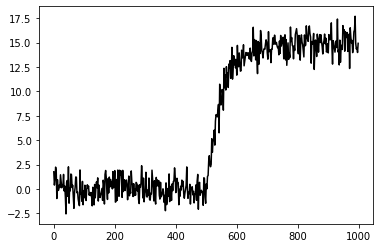

In [3]:
x = np.asarray(range(0, 1000, 2))
latency = 500
tau = 50
steady_state = 15
np.random.seed(0)

velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)

plt.plot(x, velo, 'k');

In [4]:
param_fit = [{'name':'steady_state', 'value':12,  'min':5.,  'max':40.},
             {'name':'latency',      'value':500, 'min':100, 'max':700},
             {'name':'tau',          'value':15., 'min':13., 'max':80.}]

inde_vars = {'x': x}

from lmfit import  Model, Parameters

equation = fct_velocity

params = Parameters()
model = Model(equation, independent_vars=inde_vars.keys())

for num_par in range(len(param_fit)) :
    params.add(param_fit[num_par]['name'],
               value = param_fit[num_par]['value'],
               min   = param_fit[num_par]['min'],
               max   = param_fit[num_par]['max'])

result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)


In [5]:
result_deg

In [6]:
result_deg.values['latency']

501.5071921687859

# NaN

In [7]:
N_test = 200

std_lat, covars = [], []
for y1 in range(0, 500, 20) :
    
    y2 = y1+40
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += 1*np.random.randn(x.size)
    
    velo[y1:y2] = np.nan
    
    Lats, covars_ = [], []
    for i_test in range(N_test):
        
        for num_par in range(len(param_fit)) :
            if param_fit[num_par]['name'] == 'latency' :
                val = param_fit[num_par]['value']+50*np.random.randn()
            else :
                val = param_fit[num_par]['value']
            params.add(param_fit[num_par]['name'],
                       value =  val,
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        covars_.append(result_deg.covar[1, 1])
        
    covars.append(np.mean(covars_))
    std_lat.append(np.std(Lats))
    print(f'y[{y1*2}, {y2*2}] = {np.mean(Lats):.2f} +/- {np.std(Lats):.2f} (ms); covar = {np.mean(covars_):.2f} +/- {np.std(covars_):.2f} ')

y[0, 80] = 499.17 +/- 0.00 (ms); covar = 1.78 +/- 0.00 
y[40, 120] = 500.16 +/- 0.00 (ms); covar = 1.93 +/- 0.00 
y[80, 160] = 502.57 +/- 0.00 (ms); covar = 1.75 +/- 0.00 
y[120, 200] = 499.42 +/- 0.00 (ms); covar = 1.69 +/- 0.00 
y[160, 240] = 500.07 +/- 0.00 (ms); covar = 2.13 +/- 0.00 
y[200, 280] = 500.59 +/- 0.00 (ms); covar = 1.89 +/- 0.00 
y[240, 320] = 497.68 +/- 0.00 (ms); covar = 1.92 +/- 0.00 
y[280, 360] = 498.03 +/- 0.00 (ms); covar = 2.00 +/- 0.00 
y[320, 400] = 500.07 +/- 0.00 (ms); covar = 2.28 +/- 0.00 
y[360, 440] = 500.85 +/- 0.00 (ms); covar = 1.54 +/- 0.00 
y[400, 480] = 499.27 +/- 0.00 (ms); covar = 1.74 +/- 0.00 
y[440, 520] = 506.24 +/- 0.00 (ms); covar = 4.70 +/- 0.00 
y[480, 560] = 481.19 +/- 6.25 (ms); covar = 127.53 +/- 106.46 
y[520, 600] = 499.82 +/- 0.70 (ms); covar = 2.01 +/- 0.05 
y[560, 640] = 500.00 +/- 0.00 (ms); covar = 2.41 +/- 0.16 
y[600, 680] = 498.86 +/- 0.00 (ms); covar = 2.16 +/- 0.00 
y[640, 720] = 502.05 +/- 0.26 (ms); covar = 1.81 +/- 0.10

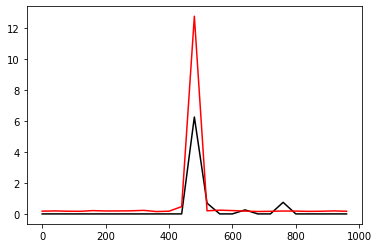

In [8]:
plt.plot(range(0, 1000, 40), std_lat, 'k')
plt.plot(range(0, 1000, 40), np.array(covars)/10, 'r');

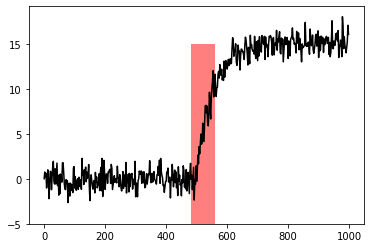

In [9]:
velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)

plt.bar(480, 20, width=80, color='r', bottom=-5, align='edge', alpha=.5)
plt.plot(x, velo, 'k');

In [22]:
result_deg.var_names

['steady_state', 'latency', 'tau']

In [23]:
result_deg.covar

array([[ 0.0074622 , -0.02333864,  0.09684424],
       [-0.02333864,  1.72766668, -1.95758811],
       [ 0.09684424, -1.95758811,  4.64520089]])